In [1]:
!pip install citipy


In [2]:
import json
import time
import requests
from pprint import pprint
import pandas as pd #(limpieza de datos)
import numpy as np #(manejo de matrices - operaciones matricilaes)
from citipy import citipy
import random
import matplotlib.pyplot as plt
from scipy.stats import linregress

api_key_ow = "82c4499ce25815a712b6c70a69597531"


In [3]:
#Creando variables aleatorias para obtener coordenadas

lon = np.arange(-180,180,0.01).tolist()
#lon = list(range(-180,181,0.0001))
lons = pd.DataFrame(random.sample(lon,5000))
lons.columns = ["Longitudes"]

lat = np.arange(-90,90,0.01).tolist()
lats = pd.DataFrame(random.sample(lat,5000))
lats.columns = ["Latitudes"]

coordinates = pd.merge(lons, lats, left_index=True, right_index=True, how="outer")

coordinates.head()


,Longitudes,Latitudes
0,92.57,79.39
1,68.40,33.04
2,123.83,-66.74
3,29.84,-6.65
4,-120.74,-32.63


In [4]:
#coordinates.shape
#coordinates.info
#len(coordinates)

In [5]:
cityNames = []

#Obteniendo los nombres de las distintas ciudades mas cercas que se en
for i in range(len(coordinates)):
    x = coordinates.loc[i]["Longitudes"]
    y = coordinates.loc[i]["Latitudes"]
    pablociudad = citipy.nearest_city(x, y)

    cityNames.append(pablociudad.city_name)

cityNames = pd.DataFrame(cityNames)

coordinates2 = pd.merge(coordinates, cityNames, left_index=True, right_index=True, how="outer")
coordinates2.rename(columns={0:"city name"}, inplace = True)
coordinates2 = coordinates2.drop_duplicates(subset=["city name"])

#Agregando  columnas para poder almacenar la data
coordinates2['temp'] = ""
coordinates2['humidity'] = ""
coordinates2['speed'] = ""
coordinates2['clouds'] = ""
coordinates2['South'] = ""
coordinates2['Long'] = ""
coordinates2['Lat'] = ""

coordinates2.reset_index(drop = True)

coordinates2.shape

(913, 10)

In [6]:
coordinates2.head()

,Longitudes,Latitudes,city name,temp,humidity,speed,clouds,South,Long,Lat
0,92.57,79.39,dikson,,,,,,,
1,68.40,33.04,olenegorsk,,,,,,,
2,123.83,-66.74,qaanaaq,,,,,,,
3,29.84,-6.65,marrakesh,,,,,,,
4,-120.74,-32.63,ushuaia,,,,,,,


In [7]:
#Llenando la tabla. Tenemos que cambiar la lat y long por los correspondientes de cada una de las ciudades

url = "http://api.openweathermap.org/data/2.5/weather?"


#Iterar para poder sacar las coordenadas de los lugares
for i,x in coordinates2.iterrows():
    
    city = x["city name"]
    query_url = url+ "appid=" + api_key_ow + "&q=" + city
        
    weather_response = requests.get(query_url)
    
    #time.sleep(1)
    
    weather_json = weather_response.json()
    try:
        coordinates2.loc[i, 'temp'] = weather_json['main']['temp']
        coordinates2.loc[i, 'humidity'] = weather_json['main']['humidity']
        coordinates2.loc[i, 'speed'] = weather_json['wind']['speed']
        coordinates2.loc[i, 'clouds'] = weather_json['clouds']['all']
        coordinates2.loc[i, 'Long'] = weather_json['coord']['lon']
        coordinates2.loc[i, 'Lat'] = weather_json['coord']['lat']
    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
print("------------")

coordinates2.reset_index(drop = True)

coordinates2.head()

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,Longitudes,Latitudes,city name,temp,humidity,speed,clouds,South,Long,Lat
0,92.57,79.39,dikson,267.65,98,4.92,0,,80.55,73.51
1,68.40,33.04,olenegorsk,273.47,95,3.92,100,,33.3,68.15
2,123.83,-66.74,qaanaaq,262.66,83,0.75,0,,-69.36,77.48
3,29.84,-6.65,marrakesh,294.15,43,4.6,40,,-8.01,31.63
4,-120.74,-32.63,ushuaia,280.15,81,1.41,84,,-68.3,-54.8


In [8]:
#Confirmar que tengamos data completa para poder trabajar

coordinates2 = coordinates2.drop(columns=["Longitudes","Latitudes"])
coordinates2.rename(columns={"Long":"Longitudes", "Lat":"Latitudes"}, inplace = True)
#coordinates2.count()
coordinates2.head()

,city name,temp,humidity,speed,clouds,South,Longitudes,Latitudes
0,dikson,267.65,98,4.92,0,,80.55,73.51
1,olenegorsk,273.47,95,3.92,100,,33.3,68.15
2,qaanaaq,262.66,83,0.75,0,,-69.36,77.48
3,marrakesh,294.15,43,4.6,40,,-8.01,31.63
4,ushuaia,280.15,81,1.41,84,,-68.3,-54.8


In [9]:
#coordinates2["temp"] = coordinates2["temp"] -273.15
#coordinates2

In [10]:

#Quitando datos que estan vacios y convirtiendo todo a valores númerico
coordinates2["temp"] = pd.to_numeric(coordinates2["temp"], errors = "coerce")
coordinates2 = coordinates2.dropna()
coordinates2.reset_index()

coordinates2["humidity"] = pd.to_numeric(coordinates2["humidity"], errors = "coerce")
coordinates2 = coordinates2.dropna()
coordinates2.reset_index()

coordinates2["speed"] = pd.to_numeric(coordinates2["speed"], errors = "coerce")
coordinates2 = coordinates2.dropna()
coordinates2.reset_index()

coordinates2["clouds"] = pd.to_numeric(coordinates2["clouds"], errors = "coerce")
coordinates2 = coordinates2.dropna()
coordinates2.reset_index()

#Cambiando la temparatura a celcius

coordinates2["temp"] = coordinates2["temp"] -273.15

for i,x in coordinates2.iterrows():
    if (x["Latitudes"] < 0):
        coordinates2.loc[i, "South"] = "South"
    else:
        coordinates2.loc[i, "South"] = "North"
        
coordinates2.reset_index(drop = True)
coordinates2.head()


,city name,temp,humidity,speed,clouds,South,Longitudes,Latitudes
0,dikson,-5.50,98,4.92,0,North,80.55,73.51
1,olenegorsk,0.32,95,3.92,100,North,33.3,68.15
2,qaanaaq,-10.49,83,0.75,0,North,-69.36,77.48
3,marrakesh,21.00,43,4.60,40,North,-8.01,31.63
4,ushuaia,7.00,81,1.41,84,South,-68.3,-54.8


# Temperature (F) vs. Latitude

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


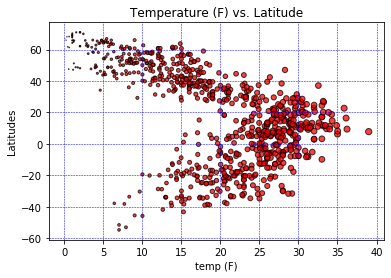

The code in analyzing the relation that temp & latitudes can have, it seems there is a positive correlation between them


In [11]:
temp = coordinates2["temp"].tolist()
Latitudes = coordinates2["Latitudes"].tolist()

plt.scatter(temp,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=temp)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("temp (F)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()
print("The code in analyzing the relation that temp & latitudes can have, it seems there is a positive correlation between them")

# Humidity (%) vs. Latitude

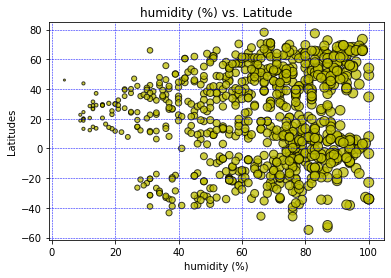

The code in analyzing the relation that humidity & latitudes can have, it seems there is a positive correlation between them


In [12]:
humidity = coordinates2["humidity"].tolist()
Latitudes = coordinates2["Latitudes"].tolist()

plt.scatter(humidity,Latitudes, marker="o", color="y", edgecolors="black", alpha = 0.75, s=humidity)
plt.title("humidity (%) vs. Latitude")
plt.xlabel("humidity (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()
print("The code in analyzing the relation that humidity & latitudes can have, it seems there is a positive correlation between them")

# Cloudiness (%) vs. Latitude

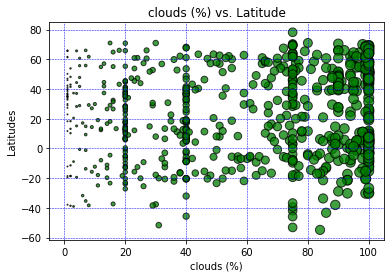

The code in analyzing the relation between the cloudiness and the latitude, it seems they do not really have a correlation


In [13]:
clouds = coordinates2["clouds"].tolist()
Latitudes = coordinates2["Latitudes"].tolist()

plt.scatter(clouds,Latitudes, marker="o", color="g", edgecolors="black", alpha = 0.75, s=clouds)
plt.title("clouds (%) vs. Latitude")
plt.xlabel("clouds (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()
print("The code in analyzing the relation between the cloudiness and the latitude, it seems they do not really have a correlation")

# Wind Speed (mph) vs. Latitude

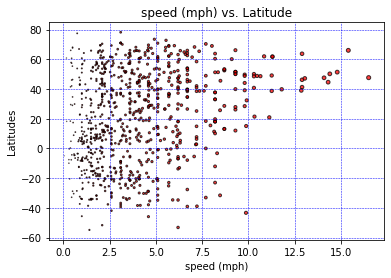

The code in analyzing the relation between wind speed and latitude, it seems that teh higher the latitude the faster the wond speed


In [14]:
speed = coordinates2["speed"].tolist()
Latitudes = coordinates2["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("speed (mph) vs. Latitude")
plt.xlabel("speed (mph)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()
print("The code in analyzing the relation between wind speed and latitude, it seems that teh higher the latitude the faster the wond speed")

In [15]:
#Creando los data frames para poder hacer los calculos de cada hemisferio
south = coordinates2.loc[coordinates2['South'] == 'South']
south.reset_index(drop = True)
north = coordinates2.loc[coordinates2['South'] == 'North']
north.reset_index(drop = True)

,city name,temp,humidity,speed,clouds,South,Longitudes,Latitudes
0,dikson,-5.50,98,4.92,0,North,80.55,73.51
1,olenegorsk,0.32,95,3.92,100,North,33.3,68.15
2,qaanaaq,-10.49,83,0.75,0,North,-69.36,77.48
3,marrakesh,21.00,43,4.60,40,North,-8.01,31.63
4,narsaq,12.00,62,5.10,95,North,-46.05,60.92
...,...,...,...,...,...,...,...,...
596,unguia,32.00,75,2.60,40,North,-77.09,8.04
597,jaque,28.84,75,1.00,100,North,-78.17,7.52
598,baniyas,16.00,82,2.10,20,North,35.95,35.18
599,tara,16.14,57,1.82,0,North,74.37,56.89


# Northern Hemisphere 

In [16]:
north.head()

,city name,temp,humidity,speed,clouds,South,Longitudes,Latitudes
0,dikson,-5.50,98,4.92,0,North,80.55,73.51
1,olenegorsk,0.32,95,3.92,100,North,33.3,68.15
2,qaanaaq,-10.49,83,0.75,0,North,-69.36,77.48
3,marrakesh,21.00,43,4.60,40,North,-8.01,31.63
6,narsaq,12.00,62,5.10,95,North,-46.05,60.92


Wind Speed (mph) vs. Latitude

R squared: 0.029605176492227


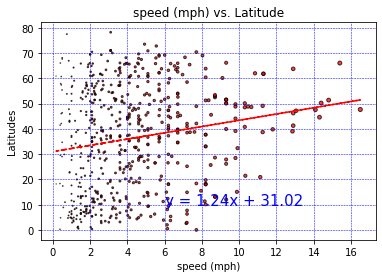

The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low


In [17]:
speed = north["speed"].tolist()
Latitudes = north["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("speed (mph) vs. Latitude")
plt.xlabel("speed (mph)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = north['speed'].astype('float')
y_values = north['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

print("The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low")

Humidity (%) vs. Latitude

R squared: 0.020991324313118433


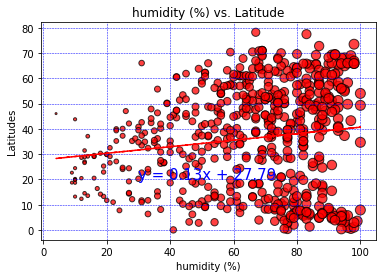

The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low and the graph points are very disperse


In [18]:
speed = north["humidity"].tolist()
Latitudes = north["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("humidity (%) vs. Latitude")
plt.xlabel("humidity (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = north['humidity'].astype('float')
y_values = north['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(30,20),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low and the graph points are very disperse")

Cloudiness (%) vs. Latitude

R squared: 0.002315017184588216


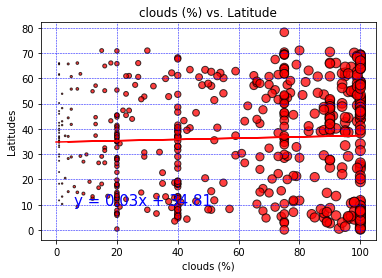

The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low


In [19]:
speed = north["clouds"].tolist()
Latitudes = north["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("clouds (%) vs. Latitude")
plt.xlabel("clouds (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = north['clouds'].astype('float')
y_values = north['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low")

Temperature (F) vs. Latitude

R squared: 0.74294652638221


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


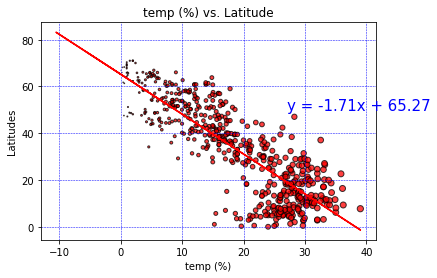

The code in analyzing the relation between the two variables, it seems that the regression i good as the r2 explains almost halfh of the points


In [20]:
speed = north["temp"].tolist()
Latitudes = north["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("temp (%) vs. Latitude")
plt.xlabel("temp (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = north['temp'].astype('float')
y_values = north['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,50),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, it seems that the regression i good as the r2 explains almost halfh of the points")

# Souther Hemisphere 

In [21]:
south.head()

,city name,temp,humidity,speed,clouds,South,Longitudes,Latitudes
4,ushuaia,7.00,81,1.41,84,South,-68.3,-54.8
10,chuy,21.31,63,3.39,0,South,-53.46,-33.7
12,bredasdorp,16.00,87,1.50,0,South,20.04,-34.53
16,mahebourg,23.00,56,4.10,40,South,57.7,-20.41
18,port alfred,21.67,46,3.57,0,South,26.89,-33.59


Temperature (F) vs. Latitude

R squared: 0.3546819756353396


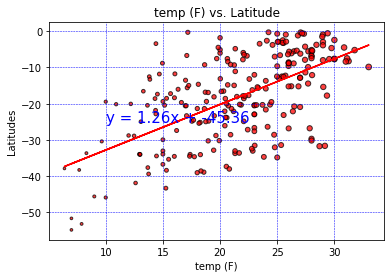

The code in analyzing the relation between the two variables, they have positive correlation but not high r2


In [22]:
speed = south["temp"].tolist()
Latitudes = south["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("temp (F) vs. Latitude")
plt.xlabel("temp (F)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = south['temp'].astype('float')
y_values = south['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-25),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, they have positive correlation but not high r2")

Humidity (%) vs. Latitude

R squared: 0.1203435039584834


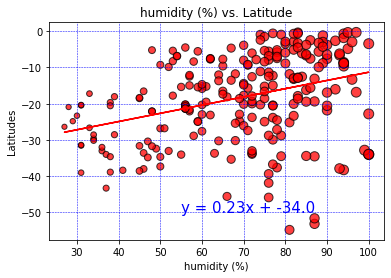

The code in analyzing the relation between the two variables, they regression is not very explicative


In [23]:
speed = south["humidity"].tolist()
Latitudes = south["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("humidity (%) vs. Latitude")
plt.xlabel("humidity (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = south['humidity'].astype('float')
y_values = south['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,-50),fontsize=15,color="b")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, they regression is not very explicative")

Cloudiness (%) vs. Latitude

R squared: 0.15313501701323054


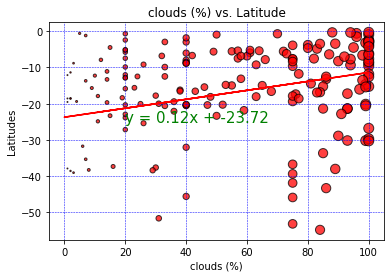

The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low


In [24]:
speed = south["clouds"].tolist()
Latitudes = south["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("clouds (%) vs. Latitude")
plt.xlabel("clouds (%)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = south['clouds'].astype('float')
y_values = south['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-25),fontsize=15,color="g")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low")

Wind Speed (mph) vs. Latitude

R squared: 0.015066246259213286


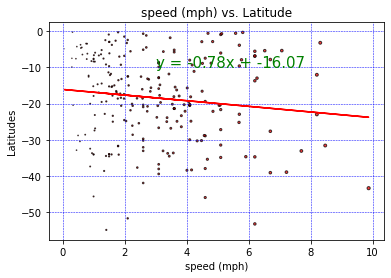

The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low


In [25]:
speed = south["speed"].tolist()
Latitudes = south["Latitudes"].tolist()

plt.scatter(speed,Latitudes, marker="o", color="r", edgecolors="black", alpha = 0.75, s=speed)
plt.title("speed (mph) vs. Latitude")
plt.xlabel("speed (mph)")
plt.ylabel("Latitudes")
plt.grid(color='b', linestyle='--', linewidth=0.5)

x_values = south['speed'].astype('float')
y_values = south['Latitudes'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,-10),fontsize=15,color="g")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
print("The code in analyzing the relation between the two variables, it seems that it is not very expicative as the r2 is very low")

In [26]:
coordinates2.to_csv("coordinates2.csv")
coordinates2.shape

(839, 8)